# HW 2



In [ ]:
import numpy as np
from IPython.display import display, Math, HTML
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt


##  Q2


### a)


In [ ]:
x = np.array([[10,1,3],[20,0,2],[30,0,1]])
y = np.array([110,110,210])

print("x =",x)
print("y =",y)
w = np.linalg.solve(x, y)
print("w =", w)


x = [[10  1  3]
 [20  0  2]
 [30  0  1]]
y = [110 110 210]
w = [  7.75 100.   -22.5 ]


### c)


In [ ]:
x = np.array([[10,1,3],[20,0,2],[30,0,1]])
y = np.array([75,110,155])
xt = x.transpose()
print("x =",x)
print("y =",y)
w = np.linalg.solve(x, y)
print("w =", w)


x = [[10  1  3]
 [20  0  2]
 [30  0  1]]
y = [ 75 110 155]
w = [ 5. 10.  5.]


## Q3





### a)


In [ ]:
data = sio.loadmat("face_emotion_data.mat")
X = data['X']
y = data['y']
w = np.linalg.inv(X.T@X)@X.T@y
print("w =", w)

w = [[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


### e)

In [ ]:
n = 16
err = 0
for i in range(8):
  ans = y[i*n:(i+1)*n] 
  Xnew = X[i*n:(i+1)*n] 
  Ydata = np.delete(y,np.s_[i*n:(i+1)*n],0)
  Xdata = np.delete(X,np.s_[i*n:(i+1)*n],0)
  w_i = np.linalg.inv(Xdata.T@Xdata)@Xdata.T@Ydata
  y_i = Xnew@w_i
  for i in range(16):
    if y_i[i] * ans[i] <0:
      err += 1
err_rate = err/(16*8)
print(err_rate)


0.046875


### f)

In [ ]:
err_1 = 0
err_2 = 0
new_X = X[:, [0,2,3]]
w_1 = np.linalg.inv(X.T@X)@X.T@y
y_1 = X@w_1
w_2 = np.linalg.inv(new_X.T@new_X)@new_X.T@y
y_2 = new_X@w_2
for i in range(len(X)):
  if y_1[i] * y[i] <0:
    err_1 += 1
  if y_2[i] * y[i] <0:
    err_2 += 1
err_rate_1 = err_1/(16*8)
err_rate_2 = err_2/(16*8)
print(err_rate_1,err_rate_2)


0.0234375 0.0625


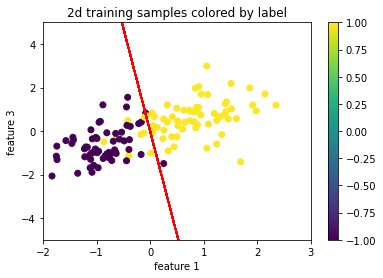

In [ ]:
import matplotlib.pyplot as plt
new_X_g = X[:, [0,2]]
w_g = np.linalg.inv(new_X_g.T@new_X_g)@new_X_g.T@y
y_g = new_X_g@w_g
y_label = np.sign(y_g)
plt.figure(1)
plt.scatter(new_X_g[:, 0], new_X_g[:, 1], c=y)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 3')
plt.title('2d training samples colored by label')
li = -new_X_g*w_g[0][0]/w_g[1][0]
plt.plot(new_X_g, li, '-r')
plt.ylim(-5,5)
plt.xlim(-2,3)
plt.show()

#Q4

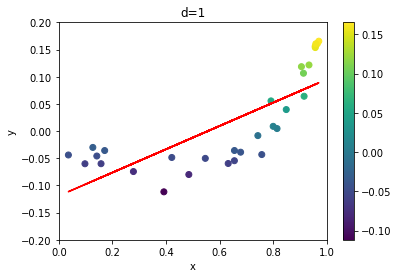

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
data = sio.loadmat("polydata.mat")
x_4 = data['x']
y_4 = data['y']
x_arr = np.array([x_4[i][0] for i in range(len(x_4))])

x_d1 = np.vander(x_arr,2, increasing=True)
w_d1 = np.linalg.inv(x_d1.T@x_d1)@x_d1.T@y_4
y_d1 = x_d1@w_d1
y_d1_label = np.sign(y_d1)

plt.figure(2)
plt.scatter(x_d1[:, 1], y_4, c=y_4)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('d=1')

plt.plot(x_d1[:,1],y_d1, '-r')
plt.ylim(-0.2,0.2)
plt.xlim(0,1)
plt.show()

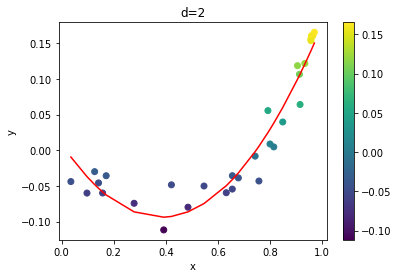

In [ ]:
x_d2 = np.vander(x_arr,3, increasing=True)
x_d2_sort = x_d2[x_d2[:,1].argsort()]
w_d2 = np.linalg.inv(x_d2.T@x_d2)@x_d2.T@y_4
y_d2 = x_d2_sort@w_d2
y_d2_label = np.sign(y_d2)

plt.figure(3)
plt.scatter(x_d2[:, 1], y_4, c=y_4)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('d=2')
plt.plot(x_d2_sort[:,1], y_d2, '-r')

plt.show()

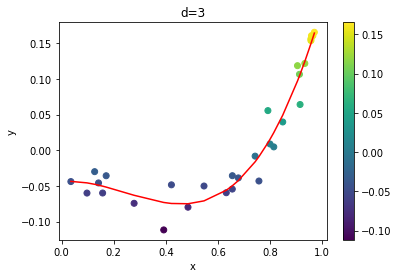

In [ ]:
x_d3 = np.vander(x_arr,4, increasing=True)
x_d3_sort = x_d3[x_d3[:,1].argsort()]
w_d3 = np.linalg.inv(x_d3.T@x_d3)@x_d3.T@y_4
y_d3 = x_d3_sort@w_d3
y_d3_label = np.sign(y_d3)

plt.figure(4)
plt.scatter(x_d3[:, 1], y_4, c=y_4)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('d=3')
plt.plot(x_d3_sort[:,1], y_d3, '-r')

plt.show()